<img src="https://i.pinimg.com/736x/30/bc/e4/30bce4982ea1debec970fc06ae8d5231.jpg" width="500px">

In [1]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for providing path
import os
print(os.listdir("../input"))


['README.md', 'marvel-wikia-data.csv', 'dc-wikia-data.csv']


**Reading the DC data**

In [2]:
# reading the data for dc

dc = pd.read_csv('../input/dc-wikia-data.csv')

# checking the head of the data
dc.head()

page_id                         name   ...   FIRST APPEARANCE    YEAR
0     1422         Batman (Bruce Wayne)   ...          1939, May  1939.0
1    23387        Superman (Clark Kent)   ...      1986, October  1986.0
2     1458   Green Lantern (Hal Jordan)   ...      1959, October  1959.0
3     1659     James Gordon (New Earth)   ...     1987, February  1987.0
4     1576  Richard Grayson (New Earth)   ...        1940, April  1940.0

[5 rows x 13 columns]

**Reading the Marvel Data**

In [3]:
# reading the marvel data

marvel = pd.read_csv('../input/marvel-wikia-data.csv')

# checking the head of the data
marvel.head()

page_id                                 name   ...   FIRST APPEARANCE    Year
0     1678            Spider-Man (Peter Parker)   ...             Aug-62  1962.0
1     7139      Captain America (Steven Rogers)   ...             Mar-41  1941.0
2    64786  Wolverine (James \"Logan\" Howlett)   ...             Oct-74  1974.0
3     1868    Iron Man (Anthony \"Tony\" Stark)   ...             Mar-63  1963.0
4     2460                  Thor (Thor Odinson)   ...             Nov-50  1950.0

[5 rows x 13 columns]

## Data Visualization

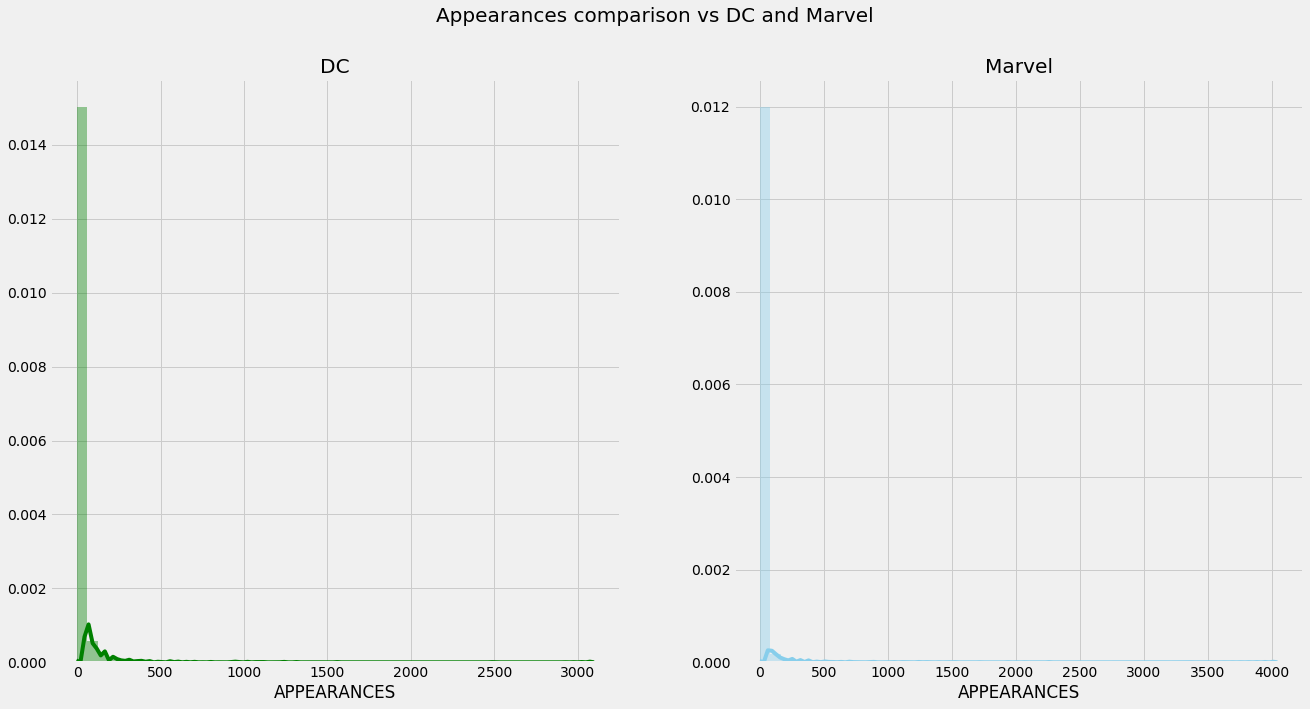

In [4]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

dc['APPEARANCES'].fillna(0, inplace = True)
marvel['APPEARANCES'].fillna(0, inplace = True)

import warnings
warnings.filterwarnings('ignore')

plt.subplot(1, 2, 1)
sns.distplot(dc['APPEARANCES'], color = 'green')
plt.title('DC')

plt.subplot(1, 2, 2)
sns.distplot(marvel['APPEARANCES'], color = 'skyblue')
plt.title('Marvel')

plt.suptitle('Appearances comparison vs DC and Marvel', fontsize = 20)
plt.show()

In [5]:
trace1 = go.Histogram(
         x = dc['ID'],
         name = 'DC',
         opacity = 0.75,
         marker = dict(
               color = 'rgb(52, 85, 159, 0.6)'
         )
)
trace2 = go.Histogram(
          x = marvel['ID'],
          name = 'Marvel',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(84, 52, 15, 0.6)'
          )
)
data = [trace1, trace2]

layout = go.Layout(
    barmode = 'group',
    title = 'Comparison of Identities')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [6]:
# create trace 1 that is 3d scatter

trace1 = go.Scatter3d(
    x = dc['APPEARANCES'],
    y = dc['YEAR'],
    z = dc['ALIVE'],
    name = 'DC',
    mode='markers',
    marker=dict(
        size=10,
        color = 'rgb(58,56,72)',                # set color to an array/list of desired values      
    )
)

trace2 = go.Scatter3d(
    x = marvel['APPEARANCES'],
    y = marvel['Year'],
    z = marvel['ALIVE'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = 'rgb(217, 2, 8)'
    )
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [7]:

trace = go.Box(
            x = dc['ALIGN'],
            y = dc['SEX'],
            name = 'DC',
            marker = dict(
                  color = 'rgb(145, 65, 75)')
)
                   

trace2 = go.Box(
            x = marvel['ALIGN'],
            y = marvel['SEX'],
            name = 'Marvel',
            marker = dict(
                   color = 'rgb(2, 15, 85)'),

              )

data = [trace, trace2]

layout = go.Layout(title = 'Character vs Gender')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [8]:
hair_dc = dc['HAIR'].value_counts()
hair_marvel = dc['HAIR'].value_counts()

trace = go.Bar(
             x = hair_dc.index,
             y = hair_dc.values,
             name = 'DC',
             marker = dict(
                  color = 'rgb(56, 54, 36)'
             )
)
trace2 = go.Bar(
            x = hair_marvel.index,
            y = hair_marvel.values,
            name = 'Marvel',
            marker = dict(
                  color = 'rgb(78, 03, 45)'
            )
)

data = [trace, trace2]

layout = go.Layout(
             barmode = 'relative',
              title = 'Different Hair Colors of SuperHeroes')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [9]:
gsm_dc = dc['GSM'].value_counts()
gsm_marvel = marvel['GSM'].value_counts()

label_dc = gsm_dc.index
size_dc = gsm_dc.values

label_marvel = gsm_marvel.index
size_marvel = gsm_marvel.values

colors = ['aqua', 'gold']

trace = go.Pie(
         labels = label_dc, values = size_dc, marker = dict(colors = colors), name = 'DC', hole = 0.3)
colors2 = ['pink', 'lightblue', 'red', 'gold', 'crimson', 'blue']

trace2 = go.Pie(labels = label_marvel, values = size_marvel, marker = dict(colors = colors2), name = 'Marvel', hole = 0.3)

data = [trace]
data2 = [trace2]

layout1 = go.Layout(
           title = 'Sexual Minority Groups in DC')
layout2 = go.Layout(
           title = 'Sexual Minority Groups in Marvel'  )

fig = go.Figure(data = data, layout = layout1)
fig2 = go.Figure(data = data2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

In [10]:
align_dc = dc['ALIGN'].value_counts()
align_marvel = marvel['ALIGN'].value_counts()

trace1 = go.Bar(
            x = align_dc.index,
            y = align_dc.values,
            name = 'DC',
            marker = dict(
                 color = 'rgb(78, 6, 2)'
            )
)
trace2 = go.Bar(
             x = align_marvel.index,
             y = align_marvel.values,
             name = 'Marvel',
             marker = dict(
                  color = 'rgb(05, 35, 20)'
             )
)
data = [trace1, trace2]

layout = go.Layout(
           barmode = 'group',
           title = 'Alignment of Characters')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Alignment')

In [11]:
sex_count_dc = dc['SEX'].value_counts()
sex_count_marvel = marvel['SEX'].value_counts()

trace1 = go.Bar(
    x = sex_count_dc.index,
    y = sex_count_dc.values,
    name = 'DC',
    marker = dict(
        color = 'rgb(26,01,98)'
    )
)

trace2 = go.Bar(
     x = sex_count_marvel.index,
     y = sex_count_marvel.values,
     name = 'Marvel',
     marker = dict(
       color = 'rgb(104, 105, 120)' 
     )
)
data = [trace1, trace2]

layout = go.Layout(
            barmode = 'stack',
            title = 'Comparison of Gender in DC and Marvel')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Gender')

## Top 15 Characters from Marvel

In [12]:

# Inspired from https://www.kaggle.com/piyush1912/dc-vs-marvel-comics 

marvel['comics'] = 'Marvel'
marvel = marvel.truncate(before=-1, after=20)
import networkx as nx
FG1 = nx.from_pandas_edgelist(marvel, source='comics', target='name', edge_attr=True,)

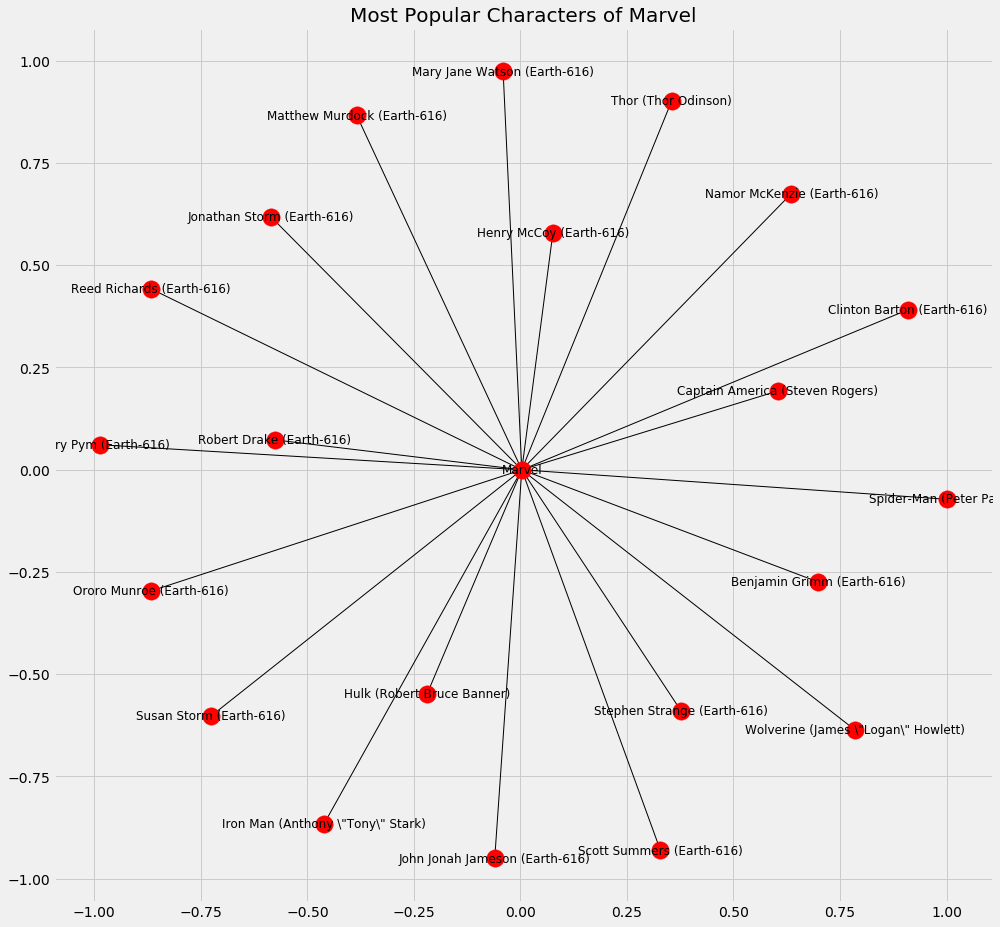

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']  = (15, 15)
plt.style.use('fivethirtyeight')
plt.title('Most Popular Characters of Marvel', fontsize = 20)

nx.draw_networkx(FG1, with_labels=True)

## Top 15 Characters from DC

In [14]:
dc['comics']= 'DC'
dc= dc.truncate(before=-1, after=15)
import networkx as nx
FG = nx.from_pandas_edgelist(dc, source='comics', target='name', edge_attr=True,)

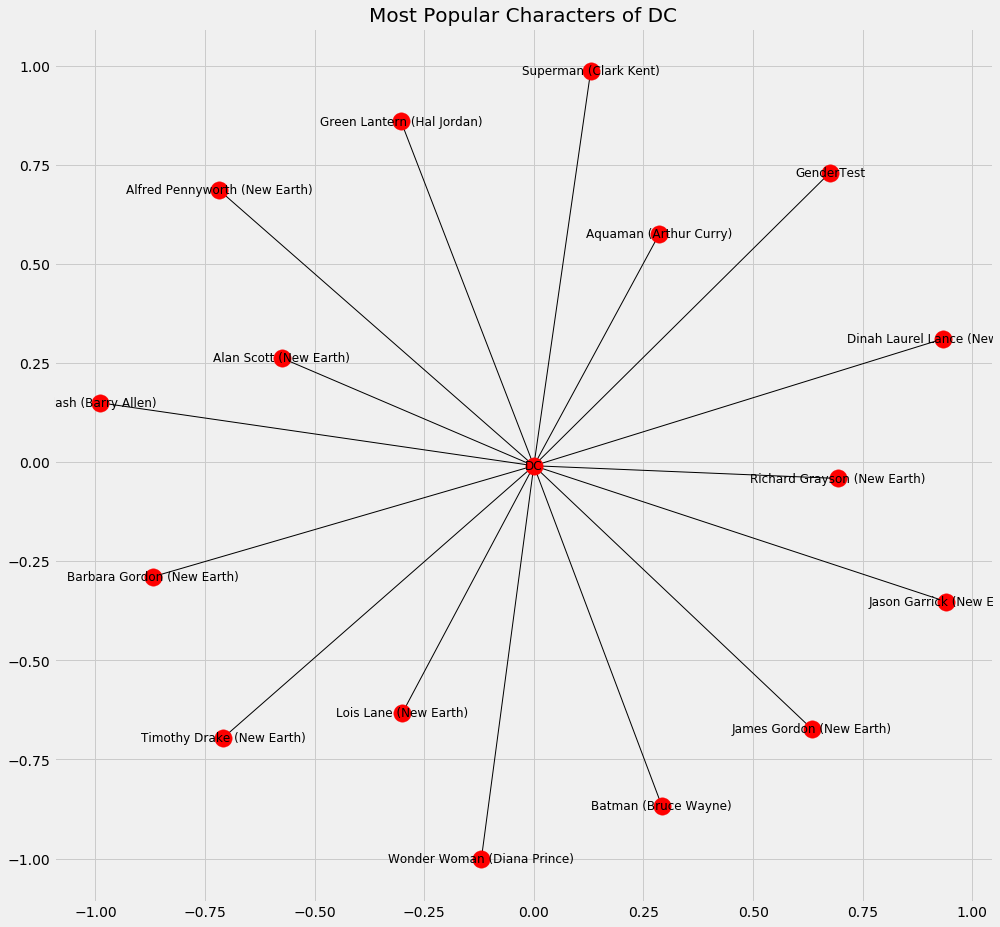

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']  = (15, 15)
plt.style.use('fivethirtyeight')
plt.title('Most Popular Characters of DC', fontsize = 20)

nx.draw_networkx(FG, with_labels=True)


**Thanks for Reading my Kernel, Please upvote if you like.**